<a href="https://colab.research.google.com/github/Dashcloud-ML/ml_projects/blob/main/Stockprice_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stock Price Prediction(Microsoft)**


**Importing Libraries and Dataset**


In [2]:

from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [3]:
microsoft = pd.read_csv('MicrosoftStock.csv')
print(microsoft.head())

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [4]:
microsoft.shape


(1259, 8)

In [5]:
microsoft.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [6]:
microsoft.describe()


,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


**EDA:**
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.

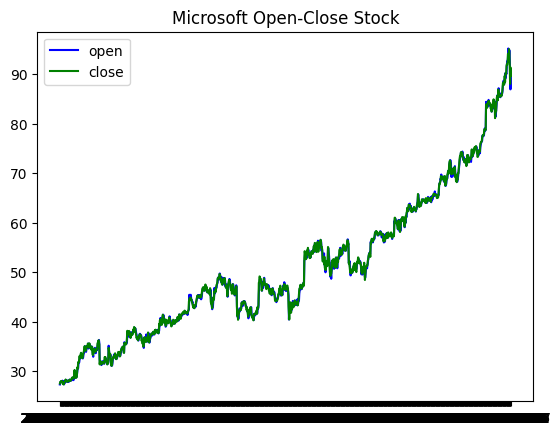

In [7]:
plt.plot(microsoft['date'],
		microsoft['open'],
		color="blue",
		label="open")
plt.plot(microsoft['date'],
		microsoft['close'],
		color="green",
		label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()


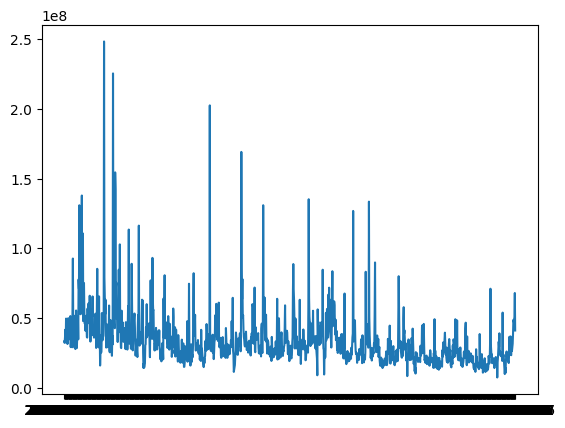

In [8]:
plt.plot(microsoft['date'],
		microsoft['volume'])
plt.show()


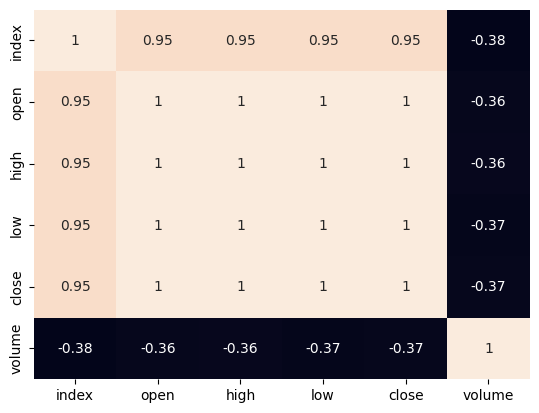

In [11]:
numeric_data = microsoft.select_dtypes(include='number')

# Generate and plot the correlation heatmap
sns.heatmap(numeric_data.corr(),
			annot=True,
			cbar=False)
plt.show()

Text(0.5, 1.0, 'Microsoft Stock Prices')

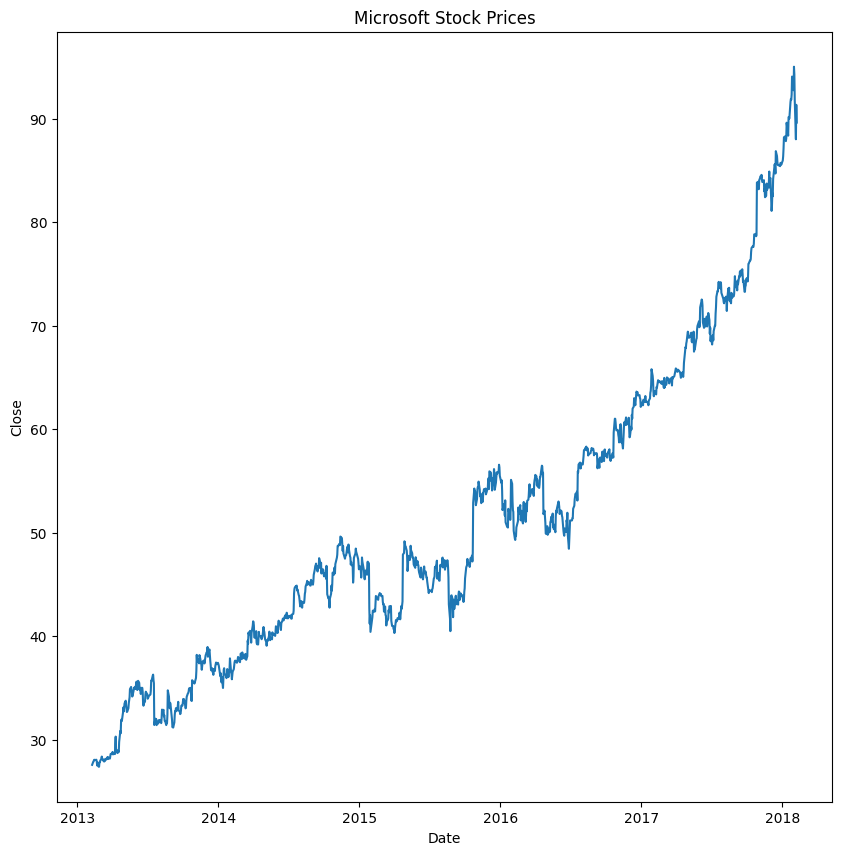

In [12]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
prediction = microsoft.loc[(microsoft['date']
							> datetime(2013, 1, 1))
							& (microsoft['date']
							< datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")


In [17]:
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training = int(np.ceil(len(dataset) * 0.95))  # Fixed the typo

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)  # Fix variable name for clarity

# Split into training data
train_data = scaled_data[0:int(training), :]

x_train = []
y_train = []

# Batch size of 60, create X_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Sequence of 60 previous values
    y_train.append(train_data[i, 0])       # Target: next value

# Convert x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape for LSTM or other RNN-based models
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

**Build the model:**
To tackle the Time Series or Stock Price Prediction problem statement, we build a Recurrent Neural Network model, that comes in very handy to memorize the previous state using cell state and memory state. Since RNNs are hard to train and prune to Vanishing Gradient, we use LSTM which is the RNN gated cell, LSTM reduces the problem of Vanishing gradients.

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape
							=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
              loss='mae',
              metrics=[RootMeanSquaredError()])  # Wrap the metric in a list

history = model.fit(X_train, y_train,
                    epochs=20)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.3562 - root_mean_squared_error: 0.5005
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.1114 - root_mean_squared_error: 0.1477
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0987 - root_mean_squared_error: 0.1317
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.1006 - root_mean_squared_error: 0.1362
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0965 - root_mean_squared_error: 0.1330
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0898 - root_mean_squared_error: 0.1183
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0878 - root_mean_squared_error: 0.1172
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0936 - root_mean_squared_error: 0.1265
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0829 - root_mean_squared_error: 0.1101
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0826 - root_mean_squared_error: 0.1125

In [23]:
# Prepare the test data
testing = scaled_data[training - 60:, :]  # Use scaled_data instead of ss
x_test = []
y_test = dataset[training:, :]   # True values for comparison (unscaled)

for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])  # Create input sequences of 60 timesteps

x_test = np.array(x_test)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Reshape for model

# Predict using the model
pred = model.predict(X_test)

# Inverse transform the predictions back to original scale
pred = scaler.inverse_transform(pred)

# Optionally, reshape predictions if needed:
# pred = pred.reshape(-1, 1)  # Reshape if your output is 1D


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


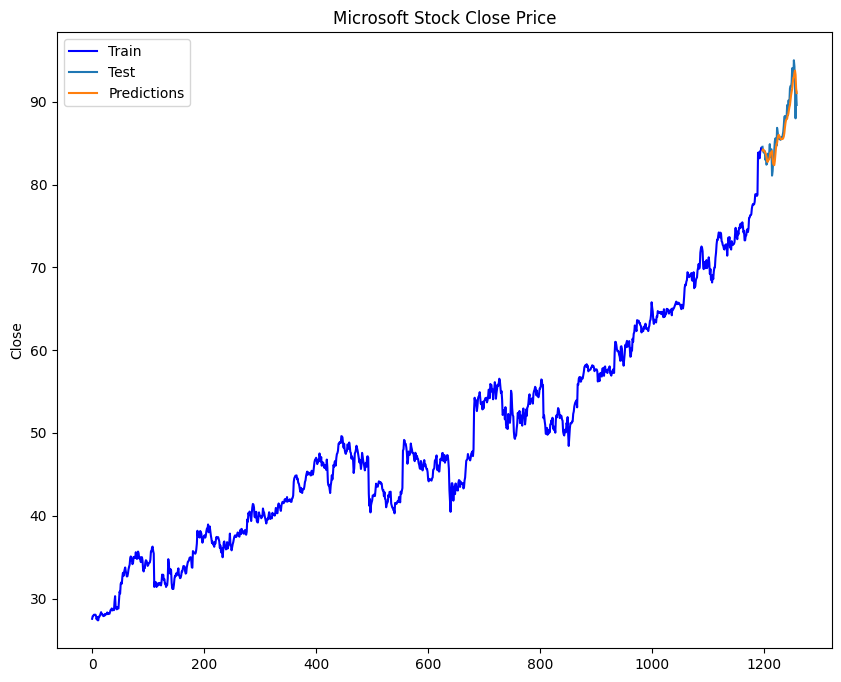

In [24]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
